### Getting bitcoin price data from investing.com data sheet


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv (r'../Datasets/BitcoinData.csv', index_col='Date', parse_dates=True)    #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print (df)

               Price      Open      High       Low    Vol. Change %
Date                                                               
2022-02-15  43,605.3  42,550.3  43,658.8  42,460.1  56.13K    2.48%
2022-02-14  42,550.3  42,061.1  42,799.7  41,591.3  53.60K    1.16%
2022-02-13  42,061.1  42,205.5  42,725.1  41,880.1  25.88K   -0.34%
2022-02-12  42,205.2  42,388.4  43,006.4  41,776.8  37.88K   -0.43%
2022-02-11  42,388.4  43,519.3  43,915.1  42,023.4  69.95K   -2.60%
...              ...       ...       ...       ...     ...      ...
2015-11-19     325.0     335.9     335.6     323.4  86.38K   -3.26%
2015-11-18     335.9     333.9     337.4     329.4  78.36K    0.60%
2015-11-17     333.9     330.2     342.9     328.1  98.25K    1.12%
2015-11-16     330.2     317.5     332.0     314.1  87.14K    4.02%
2015-11-15     317.5     331.8     334.8     314.2  88.32K   -4.32%

[2285 rows x 6 columns]


In [115]:
df.dtypes

Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [116]:
cleanData = df

repl_dict = {'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', }
cleanData['Vol.'] = cleanData['Vol.'].replace(repl_dict, regex=True).map(pd.eval).astype(float)

cleanData['Price'] = cleanData['Price'].astype(str).str.replace(',', '').astype(float)
cleanData['Open'] = cleanData['Open'].astype(str).str.replace(',', '').astype(float)
cleanData['High'] = cleanData['High'].astype(str).str.replace(',', '').astype(float)
cleanData['Low'] = cleanData['Low'].astype(str).str.replace(',', '').astype(float)
cleanData['Change %'] = cleanData['Change %'].astype(str).str.replace('%', '').astype(float)


In [117]:
cleanData.describe()

,Price,Open,High,Low,Vol.,Change %
count,2285.000000,2285.000000,2285.000000,2285.000000,2.285000e+03,2285.000000
mean,13303.703720,13284.855011,13662.048709,12862.238293,4.889052e+05,0.293527
std,16723.975876,16714.244909,17178.001115,16180.627018,1.275485e+06,3.973664
min,317.500000,317.500000,323.300000,309.500000,2.600000e+02,-39.180000
25%,2362.400000,2344.000000,2494.000000,2263.300000,6.692000e+04,-1.290000
50%,7366.700000,7363.800000,7535.600000,7185.700000,1.326000e+05,0.220000
75%,11506.900000,11503.200000,11823.300000,11226.100000,4.881600e+05,1.910000
max,67527.900000,67528.700000,68990.600000,66334.900000,2.026000e+07,25.560000


In [118]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2285 entries, 2022-02-15 to 2015-11-15
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2285 non-null   float64
 1   Open      2285 non-null   float64
 2   High      2285 non-null   float64
 3   Low       2285 non-null   float64
 4   Vol.      2285 non-null   float64
 5   Change %  2285 non-null   float64
dtypes: float64(6)
memory usage: 125.0 KB


In [119]:
cleanData.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-02-15,43605.3,42550.3,43658.8,42460.1,56130.0,2.48
2022-02-14,42550.3,42061.1,42799.7,41591.3,53600.0,1.16
2022-02-13,42061.1,42205.5,42725.1,41880.1,25880.0,-0.34
2022-02-12,42205.2,42388.4,43006.4,41776.8,37880.0,-0.43
2022-02-11,42388.4,43519.3,43915.1,42023.4,69950.0,-2.60


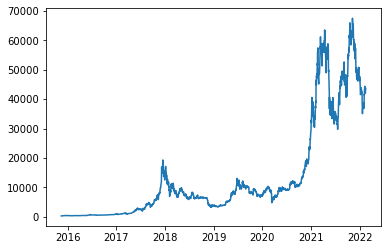

In [120]:
plt.plot(cleanData['Price'])

## Load coin metrics

In [121]:
metrics = pd.read_csv (r'../Datasets/btc.csv', index_col='time', parse_dates=True)    #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
pd.set_option('display.max_columns', None)
display(metrics)

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,AdrBalNtv1Cnt,AdrBalNtv1KCnt,AdrBalNtv1MCnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,AssetEODCompletionTime,BlkCnt,BlkSizeMeanByte,BlkWghtMean,BlkWghtTot,CapAct1yrUSD,CapMVRVCur,CapMVRVFF,CapMrktCurUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,FeeByteMeanNtv,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,FlowInExNtv,FlowInExUSD,FlowOutExNtv,FlowOutExUSD,FlowTfrFromExCnt,HashRate,HashRate30d,IssContNtv,IssContPctAnn,IssContPctDay,IssContUSD,IssTotNtv,IssTotUSD,NDF,NVTAdj,NVTAdj90,NVTAdjFF,NVTAdjFF90,PriceBTC,PriceUSD,ROI1yr,ROI30d,ReferenceRate,ReferenceRateETH,ReferenceRateEUR,ReferenceRateUSD,RevAllTimeUSD,RevHashNtv,RevHashRateNtv,RevHashRateUSD,RevHashUSD,RevNtv,RevUSD,SER,SplyAct10yr,SplyAct180d,SplyAct1d,SplyAct1yr,SplyAct2yr,SplyAct30d,SplyAct3yr,SplyAct4yr,SplyAct5yr,SplyAct7d,SplyAct90d,SplyActEver,SplyActPct1yr,SplyAdrBal1in100K,SplyAdrBal1in100M,SplyAdrBal1in10B,SplyAdrBal1in10K,SplyAdrBal1in10M,SplyAdrBal1in1B,SplyAdrBal1in1K,SplyAdrBal1in1M,SplyAdrBalNtv0.001,SplyAdrBalNtv0.01,SplyAdrBalNtv0.1,SplyAdrBalNtv1,SplyAdrBalNtv10,SplyAdrBalNtv100,SplyAdrBalNtv100K,SplyAdrBalNtv10K,SplyAdrBalNtv1K,SplyAdrBalNtv1M,SplyAdrBalUSD1,SplyAdrBalUSD10,SplyAdrBalUSD100,SplyAdrBalUSD100K,SplyAdrBalUSD10K,SplyAdrBalUSD10M,SplyAdrBalUSD1K,SplyAdrBalUSD1M,SplyAdrTop100,SplyAdrTop10Pct,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyFF,SplyMiner0HopAllNtv,SplyMiner0HopAllUSD,SplyMiner1HopAllNtv,SplyMiner1HopAllUSD,TxCnt,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,5.000000e+01,NaN,5.000000e+01,NaN,0.0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,5.000000e+01,NaN,5.000000e+01,NaN,0.0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.0,0.0,0.0,0.0,0.

In [122]:
metrics.dtypes

AdrActCnt           float64
AdrBal1in100KCnt    float64
AdrBal1in100MCnt    float64
AdrBal1in10BCnt     float64
AdrBal1in10KCnt     float64
                     ...   
TxTfrValMedNtv      float64
TxTfrValMedUSD      float64
VelCur1yr           float64
VtyDayRet180d       float64
VtyDayRet30d        float64
Length: 143, dtype: object

In [123]:
metrics.describe()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,AdrBalNtv1Cnt,AdrBalNtv1KCnt,AdrBalNtv1MCnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,AssetEODCompletionTime,BlkCnt,BlkSizeMeanByte,BlkWghtMean,BlkWghtTot,CapAct1yrUSD,CapMVRVCur,CapMVRVFF,CapMrktCurUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,FeeByteMeanNtv,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,FlowInExNtv,FlowInExUSD,FlowOutExNtv,FlowOutExUSD,FlowTfrFromExCnt,HashRate,HashRate30d,IssContNtv,IssContPctAnn,IssContPctDay,IssContUSD,IssTotNtv,IssTotUSD,NDF,NVTAdj,NVTAdj90,NVTAdjFF,NVTAdjFF90,PriceBTC,PriceUSD,ROI1yr,ROI30d,ReferenceRate,ReferenceRateETH,ReferenceRateEUR,ReferenceRateUSD,RevAllTimeUSD,RevHashNtv,RevHashRateNtv,RevHashRateUSD,RevHashUSD,RevNtv,RevUSD,SER,SplyAct10yr,SplyAct180d,SplyAct1d,SplyAct1yr,SplyAct2yr,SplyAct30d,SplyAct3yr,SplyAct4yr,SplyAct5yr,SplyAct7d,SplyAct90d,SplyActEver,SplyActPct1yr,SplyAdrBal1in100K,SplyAdrBal1in100M,SplyAdrBal1in10B,SplyAdrBal1in10K,SplyAdrBal1in10M,SplyAdrBal1in1B,SplyAdrBal1in1K,SplyAdrBal1in1M,SplyAdrBalNtv0.001,SplyAdrBalNtv0.01,SplyAdrBalNtv0.1,SplyAdrBalNtv1,SplyAdrBalNtv10,SplyAdrBalNtv100,SplyAdrBalNtv100K,SplyAdrBalNtv10K,SplyAdrBalNtv1K,SplyAdrBalNtv1M,SplyAdrBalUSD1,SplyAdrBalUSD10,SplyAdrBalUSD100,SplyAdrBalUSD100K,SplyAdrBalUSD10K,SplyAdrBalUSD10M,SplyAdrBalUSD1K,SplyAdrBalUSD1M,SplyAdrTop100,SplyAdrTop10Pct,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyFF,SplyMiner0HopAllNtv,SplyMiner0HopAllUSD,SplyMiner1HopAllNtv,SplyMiner1HopAllUSD,TxCnt,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
count,4.839000e+03,4839.000000,4.839000e+03,4.839000e+03,4839.000000,4839.000000,4.839000e+03,4839.000000,4839.000000,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000,4839.0,4.278000e+03,4278.000000,4.278000e+03,4.278000e+03,4278.000000,4.278000e+03,4.278000e+03,4278.000000,4.839000e+03,4839.000000,4.833000e+03,4.833000e+03,4.839000e+03,4.278000e+03,4278.000000,4278.000000,4.278000e+03,4.278000e+03,4.839000e+03,4.833000e+03,4.833000e+03,4.833000e+03,4581.000000,4278.000000,4581.000000,4278.000000,4839.000000,4.278000e+03,4839.000000,4.278000e+03,4839.000000,4.278000e+03,4839.000000,4.833000e+03,4.804000e+03,4833.000000,4833.000000,4833.000000,4.278000e+03,4833.000000,4.278000e+03,4833.000000,4.579000e+03,4189.000000,4.579000e+03,4188.000000,4839.0,4278.000000,3913.000000,4248.000000,4278.000000,2431.000000,3872.000000,4278.000000,4.278000e+03,4.833000e+03,4.833000e+03,4278.000000,4.278000e+03,4839.000000,4.278000e+03,4833.000000,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4833.000000,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4839.000000,4.839000e+03,4.839000e+03,4839.0,4.278000e+03,4.278000e+03,4.278000e+03,4.278000e+03,4.278000e+03,4.278000e+03,4.278000e+03,4.278000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.839000e+03,4.833000e+03,4.839000e+03,4.839000e+03,4.278000e+03,4.839000e+03,4.278000e+03,4839.000000,4839.000000,4.839000e+03,4.839000e+03,4.278000e+03,4581.000000,4278.000000,4.581000e+03,4.278000e+03,4833.000000,4098.000000,4248.000000
mean,4.062470e+05,11991.493284,1.001883e+06,5.424663e+06,901.549287,283344.990701,2.589244e+06,56.843563,86783.664393,1.253717e+07,6.183582e+06,3.378183e+06,1.318521e+06,12141.931391,1.998140,110762.502170,85.569333,422368.509403,1400.082868,0.0,3.782119e+06,86177.41

In [124]:
cleanMetrics = metrics

cleanMetrics = cleanMetrics.fillna(0)
cleanMetrics = cleanMetrics.replace("",0)

# cleanMetrics = cleanMetrics.iloc[6:]
cleanMetrics = cleanMetrics.iloc[562:]

cleanMetrics = cleanMetrics.iloc[:len(cleanMetrics)-1]

# cleanData['Price'] = cleanData['Price'].astype(str).str.replace(',', '').astype(float)
# cleanData['Open'] = cleanData['Open'].astype(str).str.replace(',', '').astype(float)
# cleanData['High'] = cleanData['High'].astype(str).str.replace(',', '').astype(float)
# cleanData['Low'] = cleanData['Low'].astype(str).str.replace(',', '').astype(float)
# cleanData['Change %'] = cleanData['Change %'].astype(str).str.replace('%', '').astype(float)

In [125]:
cleanMetrics.head(20)

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,AdrBalNtv1Cnt,AdrBalNtv1KCnt,AdrBalNtv1MCnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,AssetEODCompletionTime,BlkCnt,BlkSizeMeanByte,BlkWghtMean,BlkWghtTot,CapAct1yrUSD,CapMVRVCur,CapMVRVFF,CapMrktCurUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,FeeByteMeanNtv,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,FlowInExNtv,FlowInExUSD,FlowOutExNtv,FlowOutExUSD,FlowTfrFromExCnt,HashRate,HashRate30d,IssContNtv,IssContPctAnn,IssContPctDay,IssContUSD,IssTotNtv,IssTotUSD,NDF,NVTAdj,NVTAdj90,NVTAdjFF,NVTAdjFF90,PriceBTC,PriceUSD,ROI1yr,ROI30d,ReferenceRate,ReferenceRateETH,ReferenceRateEUR,ReferenceRateUSD,RevAllTimeUSD,RevHashNtv,RevHashRateNtv,RevHashRateUSD,RevHashUSD,RevNtv,RevUSD,SER,SplyAct10yr,SplyAct180d,SplyAct1d,SplyAct1yr,SplyAct2yr,SplyAct30d,SplyAct3yr,SplyAct4yr,SplyAct5yr,SplyAct7d,SplyAct90d,SplyActEver,SplyActPct1yr,SplyAdrBal1in100K,SplyAdrBal1in100M,SplyAdrBal1in10B,SplyAdrBal1in10K,SplyAdrBal1in10M,SplyAdrBal1in1B,SplyAdrBal1in1K,SplyAdrBal1in1M,SplyAdrBalNtv0.001,SplyAdrBalNtv0.01,SplyAdrBalNtv0.1,SplyAdrBalNtv1,SplyAdrBalNtv10,SplyAdrBalNtv100,SplyAdrBalNtv100K,SplyAdrBalNtv10K,SplyAdrBalNtv1K,SplyAdrBalNtv1M,SplyAdrBalUSD1,SplyAdrBalUSD10,SplyAdrBalUSD100,SplyAdrBalUSD100K,SplyAdrBalUSD10K,SplyAdrBalUSD10M,SplyAdrBalUSD1K,SplyAdrBalUSD1M,SplyAdrTop100,SplyAdrTop10Pct,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyFF,SplyMiner0HopAllNtv,SplyMiner0HopAllUSD,SplyMiner1HopAllNtv,SplyMiner1HopAllUSD,TxCnt,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-07-19,929.0,49297.0,52208.0,52311.0,207.0,51276.0,52311.0,54.0,51085.0,52311.0,52311.0,52311.0,51351.0,503.0,0.0,49503.0,23.0,51248.0,119.0,0.0,103.0,0.0,400.0,0.0,0.0,49409.0,19.0,0.0,1.614335e+09,174.0,800.310345,3201.241379,557016.0,83085.000568,62.565130,62.565130,279285.200000,279285.200000,4463.911468,181.543289,181.543289,3.600000e-07,0.000150,0.000012,0.0,0.0,0.05,0.004040,0.0,0.0,0.0,0.0,0.0,0.001570,0.000494,8700.0,91.870389,0.251700,702.960000,8700.0,702.960000,0.276688,85.889156,0.0,85.889156,0.0,1.0,0.080800,0.0,0.0,0.085840,0.0,0.0,0.085840,1441.255854,64.125747,5.540465e+06,447669.536617,5.181360,8700.05,702.964040,0.000054,1076742.90,956079.03,39959.37,1028279.71,1076742.90,478922.86,1076742.90,1076742.90,1076742.90,288640.70,714807.07,1076742.90,29.749160,3444906.71,3456498.74,3456500.00,956370.48,3456445.74,3456500.00,787563.72,3456147.86,3456500.00,3456500.00,3456456.09,3456427.72,3448219.01,1004792.01,0.0,600278.71,908421.45,0.0,3447271.73,994389.08,891732.43,0.0,0.0,0.0,559006.78,0.0,887733.04,1242146.56,1006476.63,3456500.0,17934137.5,3456500.00,2380385.34,192335.135472,3124984.49,252498.746792,334.0,0.003866,512.0,40243.73,3251.693384,86.951152,7.025653,2.625,0.212100,1.828863,0.0,0.0
2010-07-20,936.0,49367.0,52344.0,52456.0,213.0,51353.0,52456.0,54.0,51157.0,52456.0,52456.0,52456.0,51434.0,515.0,0.0,49582.0,23.0,51325.0,122.0,0.0,101.0,0.0,412.0,0.0,0.0,49480.0,17.0,0.0,1.614335e+09,181.0,1090.745856,4362.983425,789700.0,77335.024009,45.106630,45.106630,259000.404990,259000.404990,5741.958660,181.543289,181.543289,0.000000e+00,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.001633,0.000543,9050.0,95.316761,0.261142,676.358346,9050.0,676.358346,0.277178,215.744281,0.0,215.744281,0.0,1.0,0.074736,0.0,0.0,0.080800,0.0,0.0,0.080800,2117.614199,64.125379,5.540433e+06,414068.277311,4.792457,9050.00,676.358346,0.000057,1083243.01,962579.14,40439.9

In [126]:
cleanMetrics.describe()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,AdrBalNtv1Cnt,AdrBalNtv1KCnt,AdrBalNtv1MCnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,AssetEODCompletionTime,BlkCnt,BlkSizeMeanByte,BlkWghtMean,BlkWghtTot,CapAct1yrUSD,CapMVRVCur,CapMVRVFF,CapMrktCurUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,FeeByteMeanNtv,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,FlowInExNtv,FlowInExUSD,FlowOutExNtv,FlowOutExUSD,FlowTfrFromExCnt,HashRate,HashRate30d,IssContNtv,IssContPctAnn,IssContPctDay,IssContUSD,IssTotNtv,IssTotUSD,NDF,NVTAdj,NVTAdj90,NVTAdjFF,NVTAdjFF90,PriceBTC,PriceUSD,ROI1yr,ROI30d,ReferenceRate,ReferenceRateETH,ReferenceRateEUR,ReferenceRateUSD,RevAllTimeUSD,RevHashNtv,RevHashRateNtv,RevHashRateUSD,RevHashUSD,RevNtv,RevUSD,SER,SplyAct10yr,SplyAct180d,SplyAct1d,SplyAct1yr,SplyAct2yr,SplyAct30d,SplyAct3yr,SplyAct4yr,SplyAct5yr,SplyAct7d,SplyAct90d,SplyActEver,SplyActPct1yr,SplyAdrBal1in100K,SplyAdrBal1in100M,SplyAdrBal1in10B,SplyAdrBal1in10K,SplyAdrBal1in10M,SplyAdrBal1in1B,SplyAdrBal1in1K,SplyAdrBal1in1M,SplyAdrBalNtv0.001,SplyAdrBalNtv0.01,SplyAdrBalNtv0.1,SplyAdrBalNtv1,SplyAdrBalNtv10,SplyAdrBalNtv100,SplyAdrBalNtv100K,SplyAdrBalNtv10K,SplyAdrBalNtv1K,SplyAdrBalNtv1M,SplyAdrBalUSD1,SplyAdrBalUSD10,SplyAdrBalUSD100,SplyAdrBalUSD100K,SplyAdrBalUSD10K,SplyAdrBalUSD10M,SplyAdrBalUSD1K,SplyAdrBalUSD1M,SplyAdrTop100,SplyAdrTop10Pct,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyFF,SplyMiner0HopAllNtv,SplyMiner0HopAllUSD,SplyMiner1HopAllNtv,SplyMiner1HopAllUSD,TxCnt,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
count,4.277000e+03,4277.000000,4.277000e+03,4.277000e+03,4277.000000,4277.000000,4.277000e+03,4277.000000,4277.000000,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.0,4.277000e+03,4277.000000,4.277000e+03,4.277000e+03,4277.000000,4.277000e+03,4.277000e+03,4277.000000,4.277000e+03,4277.000000,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4277.000000,4277.000000,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4.277000e+03,4277.000000,4.277000e+03,4277.000000,4.277000e+03,4277.000000,4.277000e+03,4.277000e+03,4277.000000,4277.000000,4277.000000,4.277000e+03,4277.000000,4.277000e+03,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.0,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4.277000e+03,4.277000e+03,4.277000e+03,4277.000000,4.277000e+03,4277.000000,4.277000e+03,4277.000000,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4277.000000,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4277.000000,4.277000e+03,4.277000e+03,4277.0,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4.277000e+03,4277.000000,4277.000000,4.277000e+03,4.277000e+03,4.277000e+03,4277.000000,4277.000000,4.277000e+03,4.277000e+03,4277.000000,4277.000000,4277.000000
mean,4.596021e+05,10335.595511,1.130290e+06,6.134226e+06,917.264905,317338.107786,2.926231e+06,61.439560,94950.141454,1.418132e+07,6.992867e+06,3.818837e+06,1.488537e+06,13729.170680,2.260697,122083.641571,96.127426,474629.768997,1581.405892,0.0,3.783003e+06,86197.5644

## Checking no empty files

In [127]:
cleanMetrics.count()

AdrActCnt           4277
AdrBal1in100KCnt    4277
AdrBal1in100MCnt    4277
AdrBal1in10BCnt     4277
AdrBal1in10KCnt     4277
                    ... 
TxTfrValMedNtv      4277
TxTfrValMedUSD      4277
VelCur1yr           4277
VtyDayRet180d       4277
VtyDayRet30d        4277
Length: 143, dtype: int64

In [128]:
np.where(cleanMetrics.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [129]:
[cleanMetrics.iloc[i,j] for i,j in zip(*np.where(pd.isnull(cleanMetrics)))]

[]

In [130]:
np.where(pd.isnull(cleanMetrics))

(array([], dtype=int64), array([], dtype=int64))

# Removing Empty Cols
Row 562 has the start of a lot of data and the price

In [131]:
# cleanMetrics.drop(["AdrBalNtv100KCnt", "AdrBalNtv1MCnt", "PriceBTC", "PriceUSD", "SplyAdrBalNtv1M"], axis=1)

# Compare Datasets

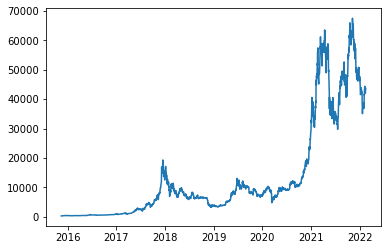

In [132]:
plt.plot(cleanData['Price'])

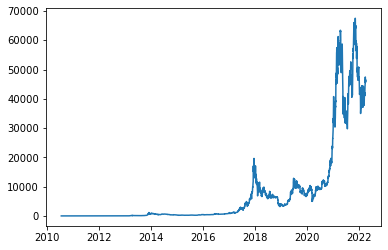

In [134]:
plt.plot(cleanMetrics['PriceUSD'])

# Combine the two data sets